### Massey Ratings
https://penaltyblog.readthedocs.io/en/latest/ratings/massey_ratings.html

In [9]:
import sys

sys.path.append("../")
import penaltyblog as pb

In [10]:
fbd = pb.scrapers.FootballData("ENG Premier League", "2021-2022")
df = fbd.get_fixtures()

df.head()

,competition,season,datetime,div,date,time,team_home,team_away,fthg,ftag,...,b365_cahh,b365_caha,pcahh,pcaha,max_cahh,max_caha,avg_cahh,avg_caha,goals_home,goals_away
id,,,,,,,,,,,,,,,,,,,,,
1628812800---brentford---arsenal,ENG Premier League,2021-2022,2021-08-13 20:00:00,E0,2021-08-13,20:00,Brentford,Arsenal,2,0,...,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09,2,0
1628899200---burnley---brighton,ENG Premier League,2021-2022,2021-08-14 15:00:00,E0,2021-08-14,15:00,Burnley,Brighton,1,2,...,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12,1,2
1628899200---chelsea---crystal_palace,ENG Premier League,2021-2022,2021-08-14 15:00:00,E0,2021-08-14,15:00,Chelsea,Crystal Palace,3,0,...,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82,3,0
1628899200---everton---southampton,ENG Premier League,2021-2022,2021-08-14 15:00:00,E0,2021-08-14,15:00,Everton,Southampton,3,1,...,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86,3,1
1628899200---leicester---wolves,ENG Premier League,2021-2022,2021-08-14 15:00:00,E0,2021-08-14,15:00,Leicester,Wolves,1,0,...,2.02,1.91,2.01,1.92,2.05,1.95,1.99,1.89,1,0


In [11]:
massey = pb.ratings.Massey(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
massey.get_ratings()

,team,rating,offence,defence
0,Man City,1.825,1.865716,-0.040716
1,Liverpool,1.7,1.733772,-0.033772
2,Chelsea,1.075,1.268494,-0.193494
3,Tottenham,0.725,1.093494,-0.368494
4,Arsenal,0.325,0.893494,-0.568494
5,West Ham,0.225,0.871272,-0.646272
6,Crystal Palace,0.1,0.600439,-0.500439
7,Leicester,0.075,0.935161,-0.860161
8,Man United,-0.0,0.800439,-0.800439
9,Brighton,-0.05,0.38655,-0.43655


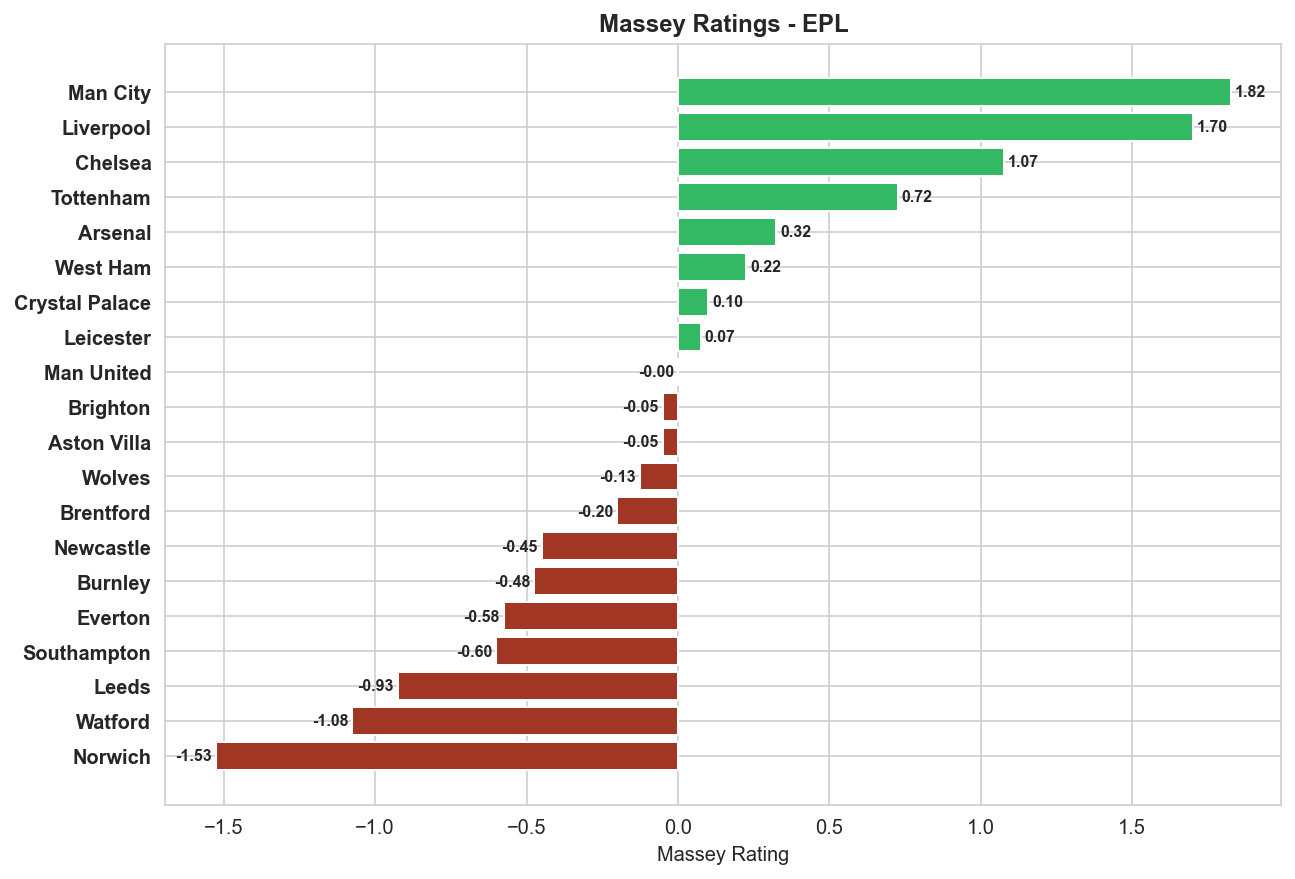

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
ratings = pd.DataFrame(massey.get_ratings())
ratings["colours"] = np.where(ratings["rating"] > 0, "#33b864", "#a03623")
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["rating"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Ratings - EPL", fontweight="bold")

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

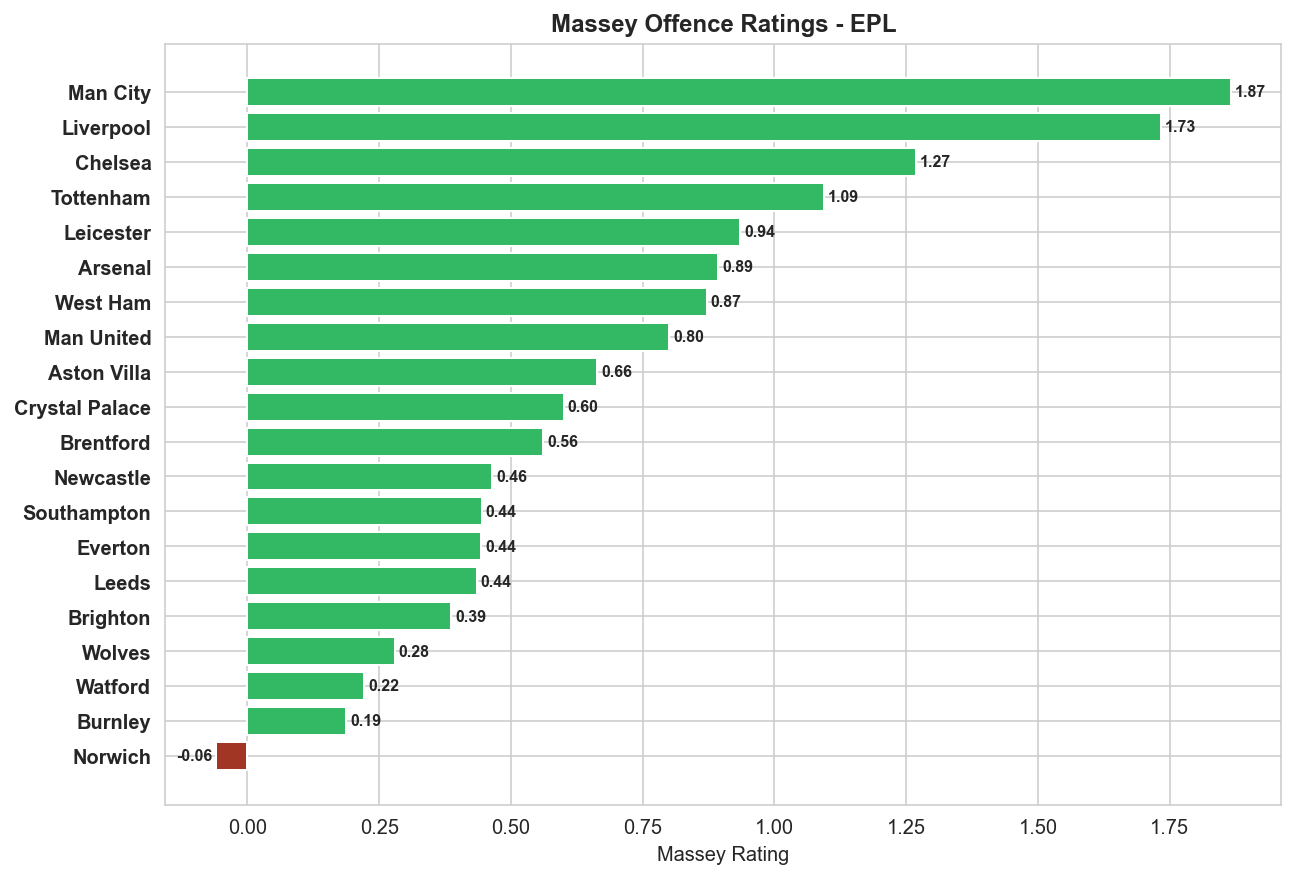

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
ratings = pd.DataFrame(massey.get_ratings())
ratings["colours"] = np.where(ratings["offence"] > 0, "#33b864", "#a03623")
ratings = ratings.sort_values("offence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["offence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Offence Ratings - EPL", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

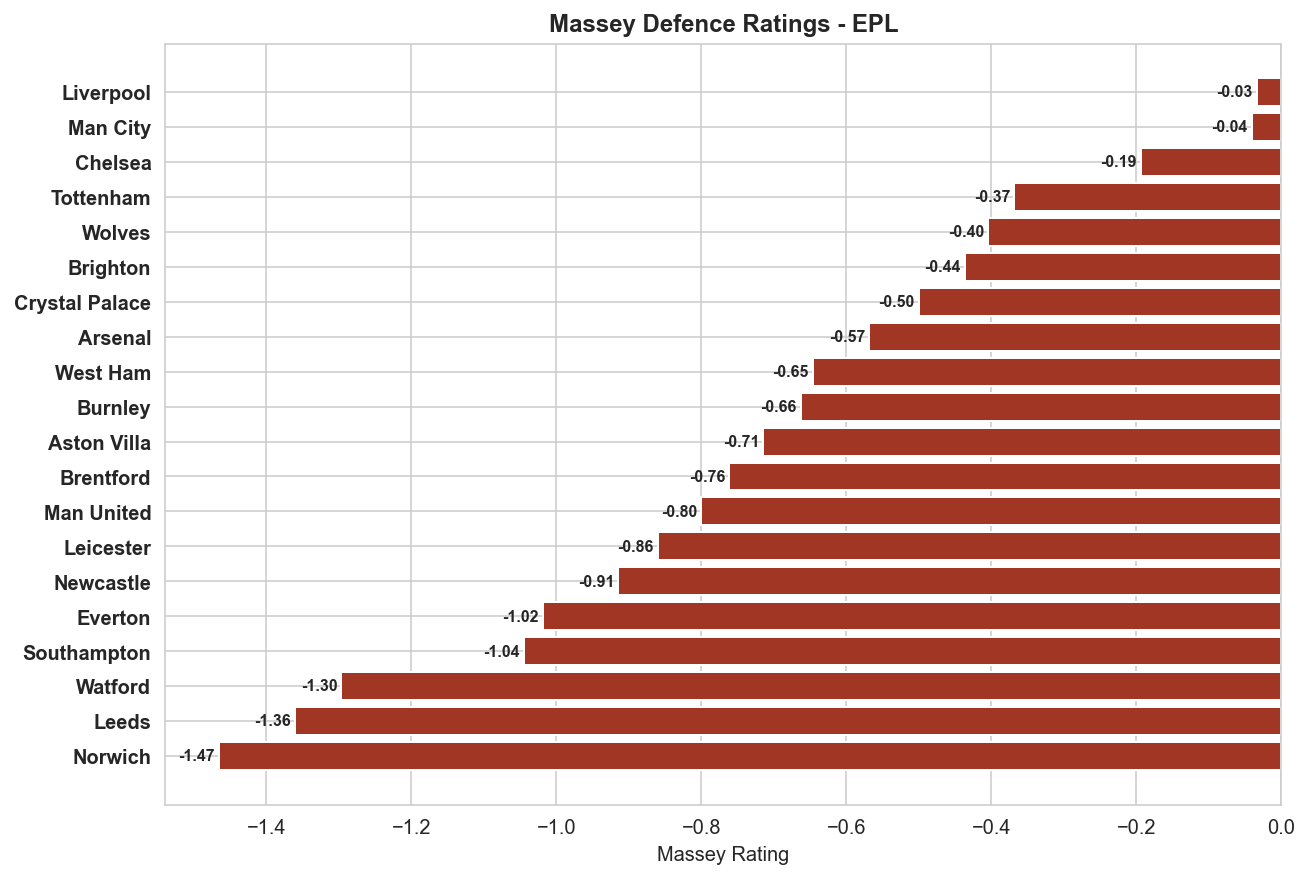

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

massey = pb.ratings.Massey(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
ratings = pd.DataFrame(massey.get_ratings())
ratings["colours"] = np.where(ratings["defence"] > 0, "#33b864", "#a03623")
ratings = ratings.sort_values("defence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["defence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Defence Ratings - EPL", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )